# Exploratory Data Analysis

In [39]:
import pandas as pd
import numpy as np
logins = pd.read_json('logins.json')

In [40]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [41]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


There 1745 duplicated rows, it seems that several time stamp are duplicated twice.  

In [48]:
duplicated_logins = logins[logins['login_time'].duplicated(keep=False)]
print(duplicated_logins)

               login_time
347   1970-01-02 10:59:52
354   1970-01-02 10:59:52
427   1970-01-02 12:27:48
434   1970-01-02 12:27:48
503   1970-01-02 15:08:27
...                   ...
92439 1970-04-12 17:12:21
92984 1970-04-13 12:23:46
92986 1970-04-13 12:23:46
93021 1970-04-13 13:44:18
93022 1970-04-13 13:44:18

[1745 rows x 1 columns]


In [51]:
logins_unique = logins.drop_duplicates(subset=['login_time'], keep='first', inplace=True)
duplicated_count = logins['login_time'].duplicated(keep=False).sum()
print(duplicated_count)

0


There are no NA values found in our data.

In [47]:
print(logins['login_time'].isna().sum())

0

In [52]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.set_index('login_time', inplace=True)

Are time stamps are from 1970-01-01 to 1970-04-13.

In [36]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame


In [91]:
# Resample data to 15-minute intervals and aggregate counts
login_counts = logins.resample('15min').size()

# Convert login_counts Series to DataFrame with columns 'time' and 'counts'
login_counts_df = pd.DataFrame({'time': login_counts.index, 'counts': login_counts.values})

# Print the DataFrame
print(login_counts_df.head())

                 time  counts
0 1970-01-01 20:00:00       2
1 1970-01-01 20:15:00       6
2 1970-01-01 20:30:00       9
3 1970-01-01 20:45:00       7
4 1970-01-01 21:00:00       1


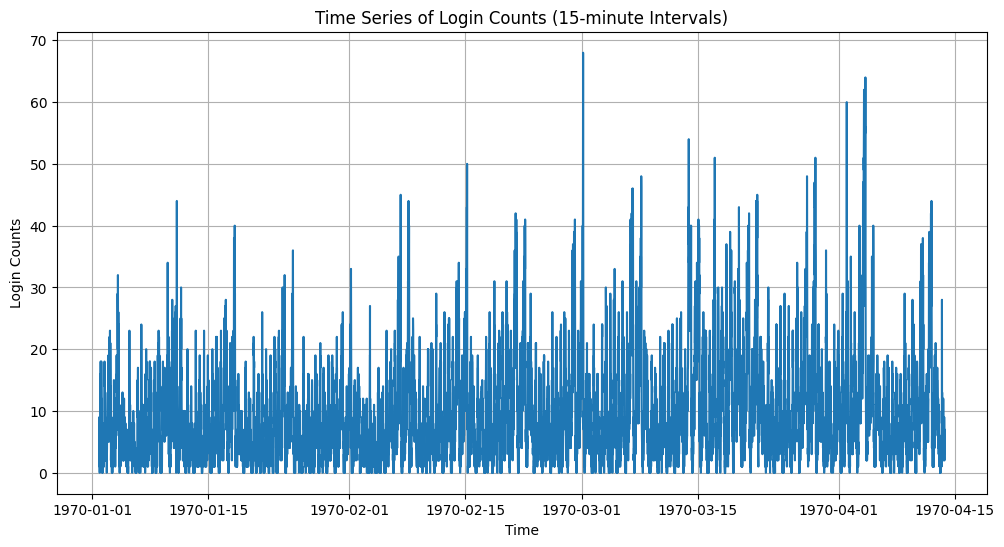

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(login_counts_df['time'], login_counts_df['counts'])
plt.title('Time Series of Login Counts (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()




The aggregation of login counts into 15-minute intervals reveals a fluctuating yet relatively consistent demand pattern from January to April 1970. Notably, there was a peak of nearly 70 login counts on March 1, 1970. While there is a slight overall increase in login counts over time, the pattern appears to be relatively stable. However, since we only have data for the months from January to April, it's challenging to predict long-term trends accurately. Based on the available data, it seems likely that the pattern will continue to be steady.

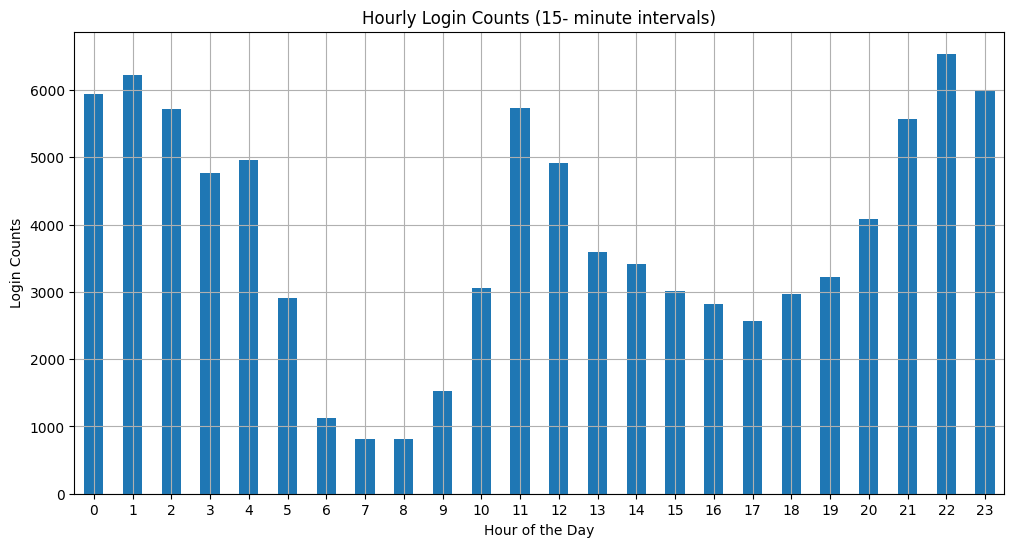

In [101]:
# Add a column for the hour
login_counts_df['hour'] = login_counts_df['time'].dt.hour

# Group by hour and calculate the sum of login counts for each hour
hourly_login_counts = login_counts_df.groupby('hour')['counts'].sum()

plt.figure(figsize=(12, 6))
hourly_login_counts.plot(kind='bar')
plt.title('Hourly Login Counts (15- minute intervals)')
plt.xlabel('Hour of the Day')
plt.ylabel('Login Counts')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

From the hourly login data displayed above, we notice distinct peaks and troughs throughout the day. The highest login counts occur between hours 0 to 4 and 21 to 23, indicating heightened activity during late night and early morning hours. Conversely, the lowest counts are observed between hours 5 to 10, with the lowest point occurring at hour 7. Additionally, there's a dip in activity between hours 13 to 20, although not as pronounced as the morning dip. Based on this pattern, we can anticipate that the busiest hours occur during the night, dawn, and around lunchtime.

# Experiment and Metrics Design

1) **Key Measure of Success:**
   The main thing we want to see if this idea works is whether more drivers are willing to give rides in both Gotham and Metropolis. So, we'll measure the success of the experiment by looking at how many trips drivers take between the two cities after we start paying for their tolls. If more drivers start working in both cities, then we know the idea is working.

   **Why this Metric:**
   We're focusing on this because it directly tells us if the plan is getting drivers to work in both cities. It's a clear way to see if the idea is making the change we want in driver behavior.

2) **Practical Experiment Design:**
   a) **Implementation:**
      - We'll pick some drivers from both cities and split them into two groups: one group won't get reimbursed for tolls (the control group), and the other will (the experimental group).
      - If available, we can also take a look at the drivers past trips to have a comparison to their trip frequency and how it is affected with or without the toll change.
      - Then, we'll start reimbursing tolls for the drivers in the experimental group and let them know about the change.
      - Over a set time (like a month), we'll keep track of how many trips each group of drivers takes between Gotham and Metropolis.

   b) **Statistical Tests:**
      - We'll compare the average number of trips between the two groups of drivers using a simple test.
      - If the drivers with toll reimbursement are taking significantly more trips between the cities compared to the ones without reimbursement, then we'll know the toll reimbursement idea is working.

   c) **Interpretation of Results and Recommendations:**
      - If we see a big difference in the number of trips between the two groups, with the toll-reimbursed group taking more trips between cities, then we can say the idea is likely working.
      - We'd recommend to keep going with the toll reimbursement plan to encourage drivers to work in both cities. But, we'll also need to keep an eye on things like cost and other factors that could affect driver behavior. It's important to make sure any changes we see are because of the toll reimbursement and not because of something else.

# Predictive Modeling

Ultimate Data Challenge JSON Data description:
* city: city this user signed up in

* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [124]:
challenge = pd.read_json('ultimate_data_challenge.json')

In [125]:
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [126]:
# look at duplicate values
challenge.duplicated(keep=False).sum()

16

In [127]:
# drop the duplicates
challenge.drop_duplicates( keep='first', inplace=True)
print(challenge.duplicated(keep=False).sum())

0


In [128]:
challenge.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8119
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

*Columns with missing values*
* avg_rating_of_driver     / 8119

* phone                    /  396

* avg_rating_by_driver     /  201

In [130]:
challenge.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,49992.0,2.278405,3.792953,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41873.0,4.601512,0.617360,1.0,4.30,4.90,5.00,5.00
avg_surge,49992.0,1.074776,0.222352,1.0,1.00,1.00,1.05,8.00
surge_pct,49992.0,8.850952,19.960094,0.0,0.00,0.00,8.60,100.00
weekday_pct,49992.0,60.929833,37.078229,0.0,33.30,66.70,100.00,100.00
avg_dist,49992.0,5.797260,5.707610,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49791.0,4.778123,0.446679,1.0,4.70,5.00,5.00,5.00


In [133]:
# lets impute the avg_rating_of_driver and avg_rating_by_driver with the mean
cols = ['avg_rating_of_driver', 'avg_rating_by_driver']
for i in cols:
    mean_val = challenge[i].mean().round(2)
    challenge[i] = challenge[i].fillna(mean_val)

# lets impute the phone with the mode or the most frequent phone used
mode_val = challenge['phone'].mode()[0]
challenge['phone'] = challenge['phone'].fillna(mode_val)

print(f'The number of null values after imputation:\n{challenge.isnull().sum()}')

The number of null values after imputation:
city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [137]:
# convert to date time
col = ['last_trip_date','signup_date']
for i in col:
    challenge[i] = pd.to_datetime(challenge[i])
print(challenge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)

In [139]:
challenge.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [153]:
# create active column
challenge['active'] = np.where(challenge['trips_in_first_30_days'] > 0, 1, 0)

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  active  
0         46.2      3.67           

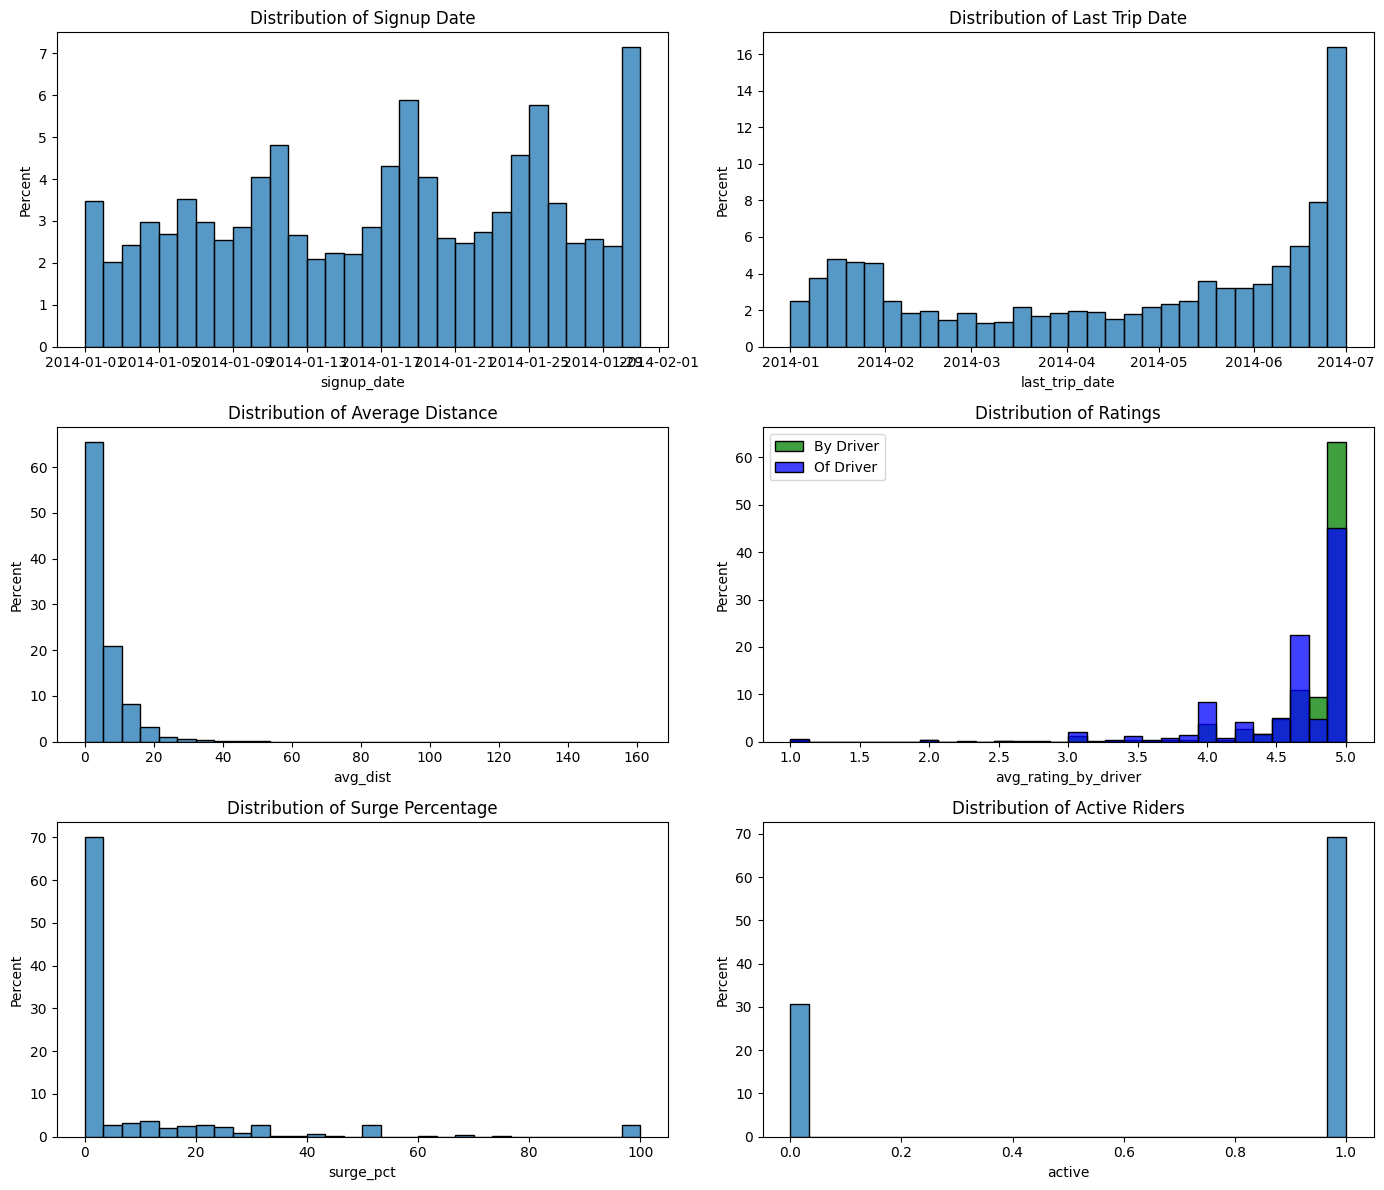

In [160]:
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Plot distribution of signup date
sns.histplot(challenge['signup_date'], bins=30, ax=axes[0, 0], stat='percent')
axes[0, 0].set_title('Distribution of Signup Date')

# Plot distribution of last trip date
sns.histplot(challenge['last_trip_date'], bins=30, ax=axes[0, 1], stat='percent')
axes[0, 1].set_title('Distribution of Last Trip Date')

# Plot distribution of average distance
sns.histplot(challenge['avg_dist'], bins=30, ax=axes[1, 0], stat='percent')
axes[1, 0].set_title('Distribution of Average Distance')

# Plot distribution of ratings (both by and of driver)
sns.histplot(challenge['avg_rating_by_driver'], bins=30, ax=axes[1, 1], color='green', label='By Driver', stat='percent')
sns.histplot(challenge['avg_rating_of_driver'], bins=30, ax=axes[1, 1], color='blue', label='Of Driver', stat='percent')
axes[1, 1].set_title('Distribution of Ratings')
axes[1, 1].legend()

# Plot distribution of surge percentage
sns.histplot(challenge['surge_pct'], bins=30, ax=axes[2, 0], stat='percent')
axes[2, 0].set_title('Distribution of Surge Percentage')

# Plot distribution of active riders
sns.histplot(challenge['active'], bins=30, ax=axes[2, 1], stat='percent')
axes[2, 1].set_title('Distribution of Active Riders')


# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [164]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct']
X = challenge[features]
y = challenge['active']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Predict on the testing set using best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Accuracy: 0.686770254884011
Accuracy: 0.6963696369636964
              precision    recall  f1-score   support

           0       0.46      0.07      0.12      3004
           1       0.71      0.97      0.82      6995

    accuracy                           0.70      9999
   macro avg       0.59      0.52      0.47      9999
weighted avg       0.63      0.70      0.61      9999

